In [17]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd

In [3]:
audio_data = 'labAudio.mp3'
y, sr = librosa.load(audio_data)

In [18]:
print(type(y), type(sr))
print(y.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(111480,) 22050


# Анализ Сигнала

Сигнал в амплитудно-временной форме

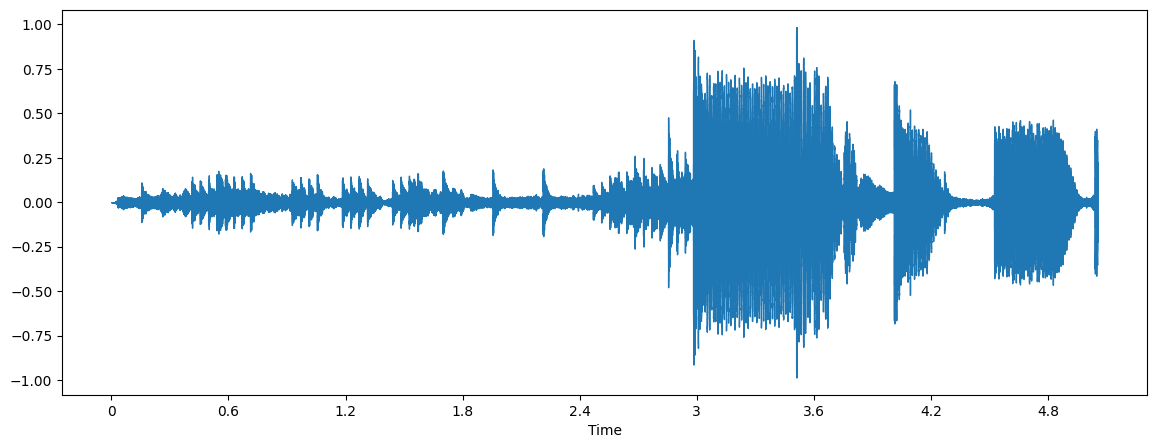

In [16]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_data)

Используя преобразование Фурье отрисовываем частотный спектр

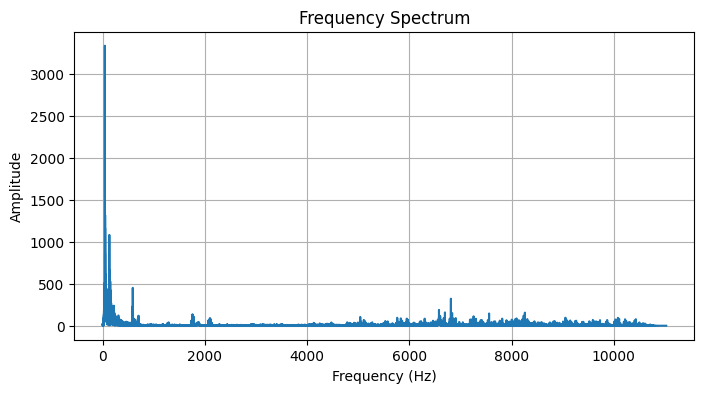

In [6]:
# Compute the FFT of the waveform
from scipy.fft import fft
spectrum = fft(y)
 
# Frequency bins
frequencies = np.fft.fftfreq(len(spectrum), 1 / sr)
 
# Plot the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

спектрограмма сигнала

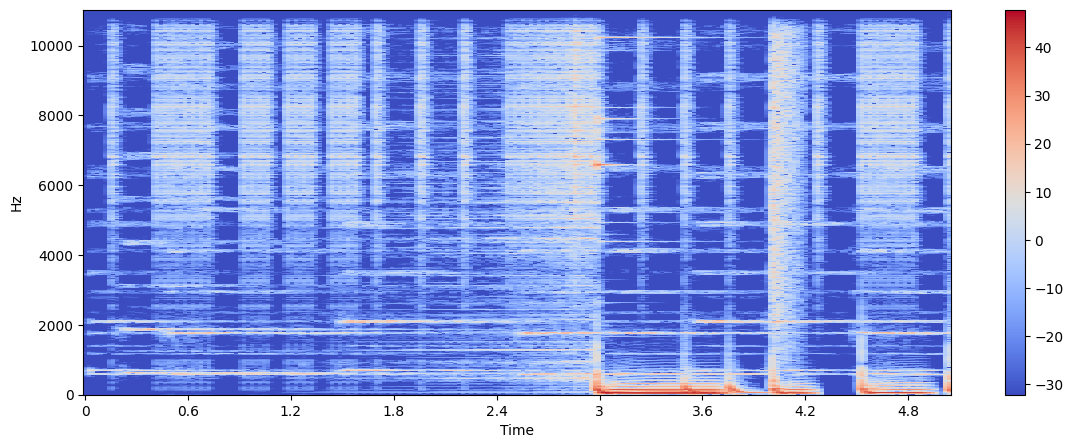

In [20]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Выдедение признаков

In [45]:
# Seperation of Harmonic and Percussive Signals
y_harmonic, y_percussive = librosa.effects.hpss(y)

значение темпа и количество бит

значение темпа и количество бит
ошибка заключалась в том, что мы пытались передать больше позиционных аргументов, чем она может воспринять (takes from 0 to 1 positional arguments but 2 positional arguments were given) из-за чего не получалось установить data

Detected Tempo: [117.45383523] beats/min
[1 2 3 4 5 6 7 8]


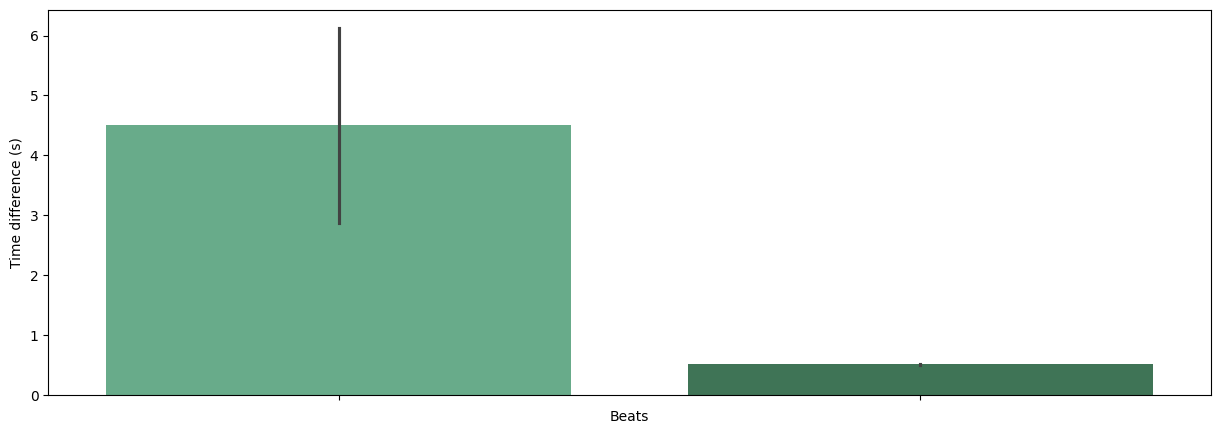

In [44]:
# Beat Extraction
import pandas
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
df = pandas.DataFrame({'Beats': beat_nums, 'Time difference (s)': beat_time_diff})
g=sns.barplot(df,  palette="BuGn_d", ax=ax)
g=g.set(xticklabels=[])

получить и вывести в виде изображения мелкепстральные коэффициенты

Text(0.5, 1.0, 'MFCC')

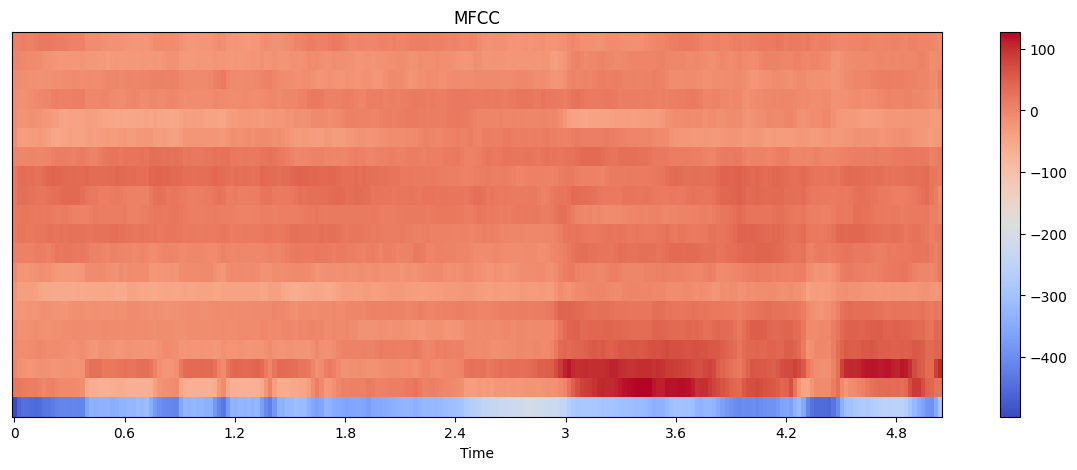

In [9]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

получить и вывести в виде numpy массива мелкепстральные коэффициенты

In [46]:
mfccs

array([[-4.9651489e+02, -4.5787570e+02, -4.4479425e+02, ...,
        -3.9288986e+02, -3.5138904e+02, -2.9025763e+02],
       [ 1.8156853e+01,  1.7957016e+01,  1.4456514e+01, ...,
         4.0556000e+01,  2.6514309e+01,  2.3235003e+01],
       [-2.9555327e-01, -1.1794941e+01, -1.7819654e+01, ...,
         3.3014023e+01,  8.4877014e+01,  1.0506252e+02],
       ...,
       [-9.1222410e+00, -1.1039616e+01, -1.3294468e+01, ...,
        -6.1081390e+00, -4.5139022e+00,  9.8969154e+00],
       [ 4.4066775e-01,  2.5477695e-01, -2.4515779e+00, ...,
        -9.7940531e+00, -1.0998679e+01, -6.6423135e+00],
       [ 4.8342848e+00,  4.8105955e+00,  8.8810062e+00, ...,
        -9.2342591e-01, -2.1170378e+00, -9.1282654e+00]], dtype=float32)

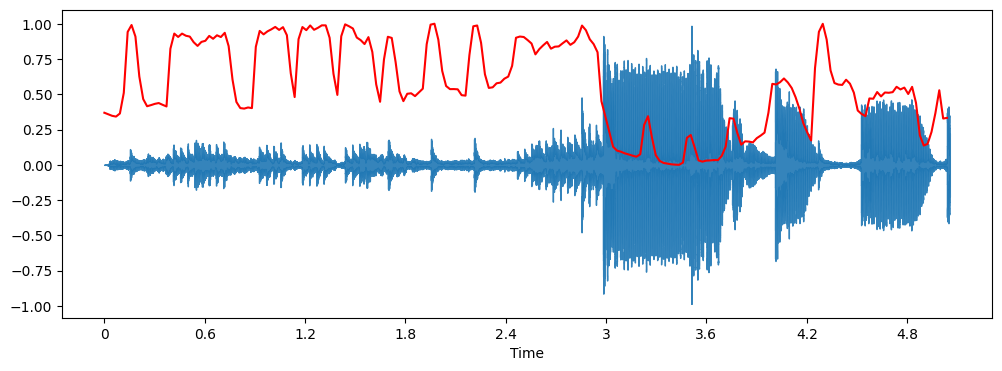

In [58]:
import sklearn

cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroids = cent[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.9)
plt.plot(t, normalize(spectral_centroids), color='r')

1. Гармонические звуки — это звуки с устойчивыми частотными паттернами. Они образуют периодические колебания и содержат основную частоту и её гармоники.
2. Перкуссионные звуки — это звуки с короткими и резкими изменениями во времени. Они часто используются для ритмических акцентов и ударных эффектов.
3. разделение на гармонические и перкуссионные звуки могут ипользоваться в обработке, улучшении качества того же звука. Так же это разделение позволяет получить определенную звуковую дорожку, будь то партия ударных или же мелодия или голос, что в свою очередь позволяет делать минусы, ремиксы, мэшапы.